In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

raw_data = pd.read_csv('../rodpump_noImputed.csv')


In [39]:
from sklearn.preprocessing import LabelEncoder

def encode(df, columns):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

In [40]:
categorical_columns = ['bha_configuration',
                      'wellbore_category',
                       'packer_vs_tac',
                       'rod_sinker_type',
                       'manual_scale',
                       'rod_make',
                       'rod_apigrade',
                       'DESANDDEGAS_TYP',
                       'rod_has_guides',
                       'FAILURETYPE'
                      ]

In [41]:
for column in raw_data:
    if (column in categorical_columns):
        encode(raw_data, column)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [51]:
#remove pump identifiers
features = list(raw_data)
features.remove('FAILURETYPE')
features.remove('roduid')
features.remove('UWI')
features.remove('lifetime_end')
features.remove('pump_bore')

#define x and y dataset (train/ test data)
X = np.array(raw_data[features])
y = np.array(raw_data['FAILURETYPE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

<AxesSubplot:>

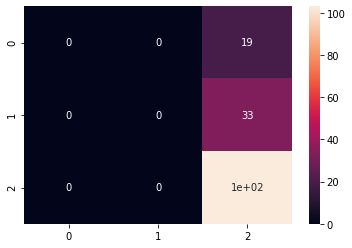

In [52]:
reg_svc = SVC(gamma='auto')
reg_svc.fit(X_train, y_train)
y_pred = reg_svc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6064516129032258